In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.special import erfc
import math

def Q(x):
    return (0.5 * erfc(x/(np.sqrt(2))))

In [3]:
def Pb_BPSK(EbN0):
    return Q(np.sqrt(2*EbN0))

In [4]:
def Pb_DE_BPSK(EbN0):
    return 2 * Q(np.sqrt(2*EbN0)) - 2 * Q(np.sqrt(2*EbN0))**2

In [24]:
def Pb_QPSK(EbN0):
    return Q(np.sqrt(2*EbN0))

In [25]:
def Pb_DE_QPSK(EbN0):
    return 2 * Q(np.sqrt(2*EbN0)) * (1 - Q(np.sqrt(2*EbN0)))

In [5]:
def dB(x):
    return 10 * math.log10(x)
def from_dB(x):
    return math.pow(10, x/10)

In [6]:
def berawgn_BPSK(EbN0):
    """ Calculates theoretical bit error rate in AWGN (for BPSK and given Eb/N0) """
    return Pb_BPSK(from_dB(EbN0))

In [16]:
x_data = np.linspace(0, 10, 10 + 1)

In [17]:
y_data_bpsk = [Pb_BPSK(from_dB(x)) for x in x_data]
y_data_dbpsk = [Pb_DE_BPSK(from_dB(x)) for x in x_data]

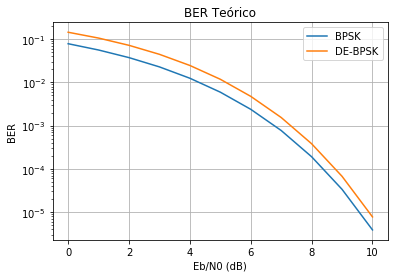

In [18]:
plt.semilogy(x_data, y_data_bpsk, label = "BPSK")
plt.semilogy(x_data, y_data_dbpsk, label = "DE-BPSK")
plt.legend()
plt.title("BER Teórico")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("BER")
plt.grid()
# plt.savefig("a.png", dpi = 200)

In [19]:
import pandas as pd

In [20]:
pd_data = np.array([x_data, y_data_bpsk, y_data_dbpsk]).T

In [21]:
dF = pd.DataFrame(data = pd_data, columns = ["Eb/N0", "BPSK", "DE-BPSK"])

In [22]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [23]:
dF

,Eb/N0,BPSK,DE-BPSK
0,0.00000000,0.07864960,0.14492769
1,1.00000000,0.05628195,0.10622859
2,2.00000000,0.03750613,0.07219884
3,3.00000000,0.02287841,0.04470997
4,4.00000000,0.01250082,0.02468910
5,5.00000000,0.00595387,0.01183684
6,6.00000000,0.00238829,0.00476517
7,7.00000000,0.00077267,0.00154416
8,8.00000000,0.00019091,0.00038174
9,9.00000000,0.00003363,0.00006725


In [ ]:
##################

In [27]:
y_data_qpsk = [Pb_QPSK(from_dB(x)) for x in x_data]
y_data_dqpsk = [Pb_DE_QPSK(from_dB(x)) for x in x_data]

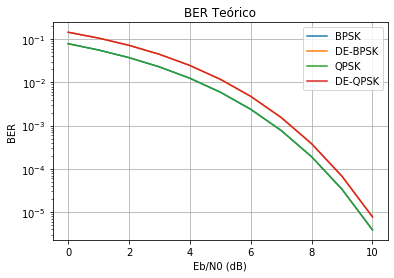

In [29]:
plt.semilogy(x_data, y_data_bpsk, label = "BPSK")
plt.semilogy(x_data, y_data_dbpsk, label = "DE-BPSK")
plt.semilogy(x_data, y_data_qpsk, label = "QPSK")
plt.semilogy(x_data, y_data_dqpsk, label = "DE-QPSK")
plt.legend()
plt.title("BER Teórico")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("BER")
plt.grid()
# plt.savefig("a.png", dpi = 200)